# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Valencia Romero, Natalia Brillit

2. Carlos Miranda, Jorge Augusto

3. Velásquez Zegarra, Víctor Manuel


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [ ]:
!pip install -q kaggle
!pip install -q scikeras

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"v1ctormanuel","key":"0e679087bffbf17330e89285b085a0a7"}'}

# Descargar la base de datos

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 66% 41.0M/62.6M [00:00<00:00, 227MB/s]
100% 62.6M/62.6M [00:00<00:00, 239MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [ ]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [ ]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


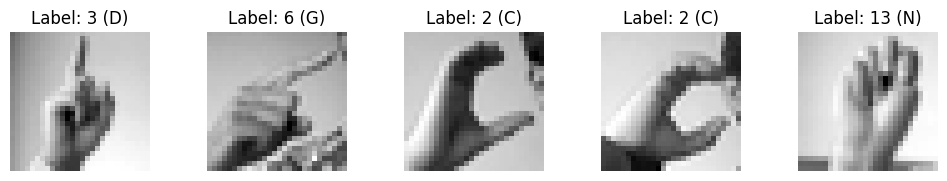

In [ ]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



**1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?**

Es una técnica que amplía el conjunto de datos inicial mediante modificaciones como rotaciones, recortes o cambios de color en las imágenes, generando versiones variadas de los mismos ejemplos. Esto permite que una red neuronal convolucional (CNN) aprenda patrones más diversos, ayudando al modelo a generalizar mejor y reducir el sobreajuste sin necesidad de recolectar nuevos datos.

**2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?**

La normalización es clave en el preprocesamiento de datos porque ajusta los valores a un rango común, sin importar su escala original. Esto permite que el modelo entrene de manera más eficiente al reducir el impacto de las diferencias de magnitud entre atributos. Al normalizar, se evita que ciertos valores dominen sobre otros y se facilita un aprendizaje más rápido y estable en el modelo, mejorando así su rendimiento y precisión en la clasificación o predicción.


# Creación del modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)

*1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?*

Las capas Conv2D extraen características relevantes de las imágenes al aplicar filtros que identifican patrones locales como bordes y texturas. La capa MaxPooling2D reduce las dimensiones de estos datos, disminuyendo el tamaño espacial de las características y haciendo el modelo más eficiente y menos propenso al sobreajuste, al tiempo que mantiene las características esenciales.

*2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?*

Dropout es una técnica que desactiva de forma aleatoria una fracción de las neuronas durante el entrenamiento. Esto previene el sobreajuste, ya que evita que el modelo dependa en exceso de neuronas específicas, haciendo que aprenda patrones más generales y robustos.

*3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?*

La función de activación ReLU (Rectified Linear Unit) se utiliza en las capas ocultas para introducir no linealidades, permitiendo que el modelo aprenda relaciones complejas entre las características. ReLU es computacionalmente eficiente y reduce problemas de desvanecimiento del gradiente, acelerando el entrenamiento.

*4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?*

La función de activación softmax en la capa de salida convierte las salidas en probabilidades, asignando a cada clase una probabilidad que suma 1. Es ideal para problemas de clasificación multicategoría, donde el modelo debe elegir una entre varias clases posibles.

*5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?*

El tamaño del filtro en una capa convolucional es el área del filtro aplicado a la imagen para extraer características. Tamaños más pequeños capturan detalles locales; tamaños más grandes extraen patrones más amplios.

*6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?*

Un stride mayor que 1 reduce la resolución de la salida de la capa convolucional, ya que el filtro se desplaza más en cada paso. Esto disminuye el tamaño de la salida y reduce el costo computacional, aunque puede perder información detallada.

*7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?*

El tamaño del filtro y el stride deben seleccionarse considerando el balance entre precisión en la extracción de características y la eficiencia del modelo. Filtros pequeños y strides de 1 capturan más detalles, adecuados para tareas complejas; tamaños mayores y strides de 2 o más son mejores para simplificar el modelo y reducir datos redundantes.




# Terminación anticipada y Checkpoints

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [ ]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?

EarlyStopping es una técnica que detiene el entrenamiento de un modelo cuando el rendimiento sobre el conjunto de validación deja de mejorar después de cierto número de épocas. Esto evita el sobreajuste y ahorra tiempo de cómputo, ya que el modelo deja de entrenarse una vez que alcanza su mejor rendimiento posible en validación.

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?

ModelCheckpoint guarda el modelo en el estado en el que alcanzó el mejor rendimiento durante el entrenamiento. Es útil porque asegura que, incluso si el modelo empeora en épocas posteriores, se conservará una versión que maximizó el rendimiento sobre los datos de validación, lo que permite cargar este modelo optimizado sin tener que repetir el entrenamiento.



# Entrenamiento

In [ ]:
epochs = 2

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1149 - loss: 2.9447 Modelo guardado época 1 con exactitud: 0.5583
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.1160 - loss: 2.9404 - val_accuracy: 0.5583 - val_loss: 1.2722
Epoch 2/2
857/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4921 - loss: 1.4772 Modelo guardado época 2 con exactitud: 0.7639
858/858 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.4922 - loss: 1.4769 - val_accuracy: 0.7639 - val_loss: 0.7081


1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?

El parámetro epochs define el número de veces que el modelo verá todo el conjunto de datos de entrenamiento completo. Un número de épocas demasiado bajo puede llevar a un modelo subentrenado, mientras que uno excesivo puede provocar sobreajuste. Elegir un valor adecuado permite al modelo aprender patrones relevantes sin memorizar detalles específicos del conjunto de entrenamiento.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?

Train_generator y val_generator son generadores que proporcionan lotes de datos al modelo durante el entrenamiento y la validación, respectivamente. train_generator suministra datos de entrenamiento, aplicando a menudo transformaciones como data augmentation para mejorar la generalización del modelo. val_generator, en cambio, proporciona datos de validación sin modificaciones, permitiendo evaluar el rendimiento del modelo en un conjunto independiente y monitorear mejoras durante el entrenamiento.



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


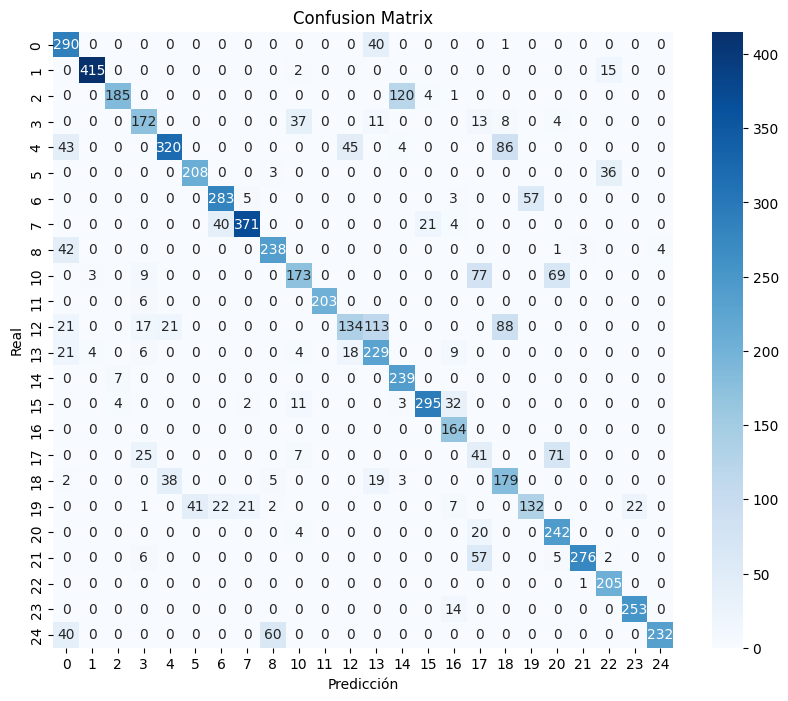

              precision    recall  f1-score   support

           0       0.63      0.88      0.73       331
           1       0.98      0.96      0.97       432
          10       0.94      0.60      0.73       310
          11       0.71      0.70      0.71       245
          12       0.84      0.64      0.73       498
          13       0.84      0.84      0.84       247
          14       0.82      0.81      0.82       348
          15       0.93      0.85      0.89       436
          16       0.77      0.83      0.80       288
          17       0.73      0.52      0.61       331
          18       1.00      0.97      0.99       209
          19       0.68      0.34      0.45       394
           2       0.56      0.79      0.65       291
          20       0.65      0.97      0.78       246
          21       0.92      0.85      0.88       347
          22       0.70      1.00      0.82       164
          23       0.20      0.28      0.23       144
          24       0.49    

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

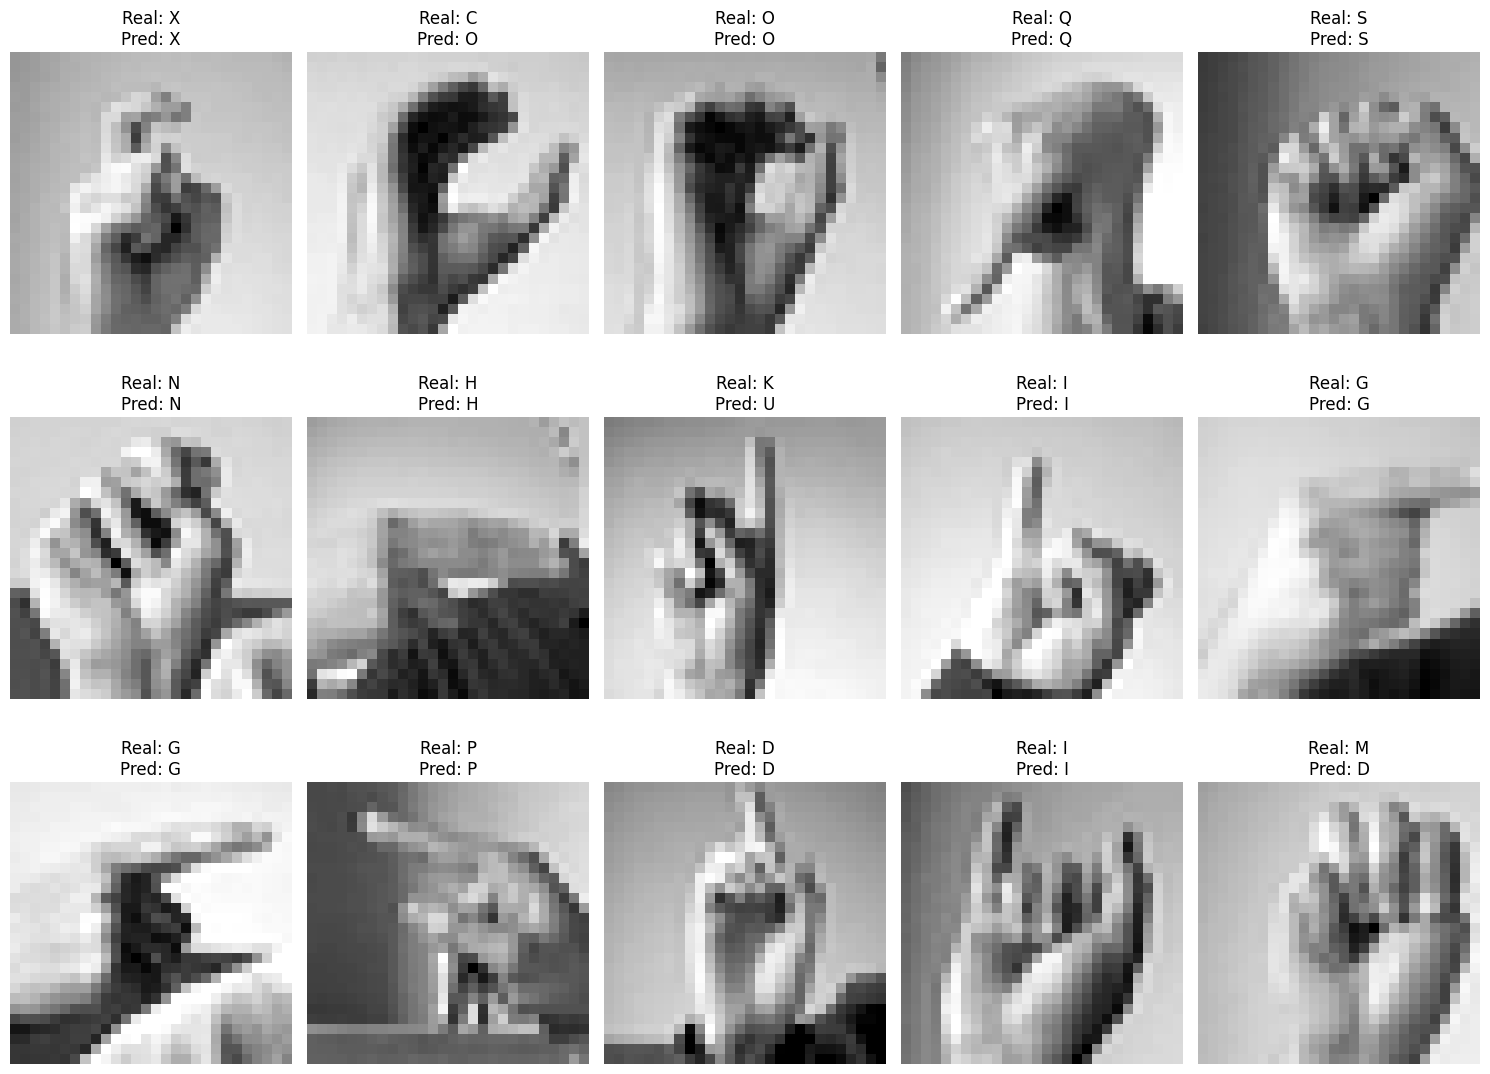

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
La confusion_matrix es una tabla que muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, lo que permite evaluar el rendimiento del modelo de clasificación.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
El classification_report resume la precisión, recuperación, F1-score y soporte para cada clase, proporcionando una visión clara del rendimiento del modelo en términos de calidad de las predicciones.

3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?
Es esencial para evitar el sobreajuste y para evaluar la capacidad de generalización del modelo en datos no vistos, lo que proporciona una estimación realista de su rendimiento.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?
np.argmax se utiliza para obtener el índice de la clase con la mayor probabilidad en las salidas del modelo, convirtiendo las predicciones en clases finales.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?
El mapa de calor visualiza la matriz de confusión, facilitando la identificación de errores de clasificación y el rendimiento del modelo en diferentes clases mediante colores.

# Refinamiento

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import GridSearchCV

epochs = 2
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.9700600863229948 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [ ]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9531511433351925


1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
GridSearchCV es una herramienta de Scikit-learn utilizada para optimizar el rendimiento de un modelo mediante la búsqueda exhaustiva de los mejores hiperparámetros en un conjunto definido (param_grid). Evalúa todas las combinaciones de estos parámetros usando validación cruzada para identificar los que ofrecen el mejor rendimiento, evitando el sobreajuste y mejorando la generalización.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
Los parámetros en param_grid representan los hiperparámetros del modelo a ajustar. Ajustar el optimizador es crucial porque influye en la convergencia del modelo, mientras que la tasa de dropout es importante para regularizar y prevenir el sobreajuste, asegurando un balance entre ajuste y generalización.

3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
El parámetro cv=3 indica que los datos se dividen en tres conjuntos para validación cruzada, permitiendo que cada conjunto se use como evaluación una vez. Esto proporciona una estimación más robusta del rendimiento del modelo, ayudando a reducir la varianza en las evaluaciones y asegurando que todos los datos se utilicen para el entrenamiento y la evaluación.
